In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.mode.chained_assignment = None

In [4]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean1.csv')

In [5]:
#In this workbook, we will be looking at the tight end position
te=df[df['Position'] == 'TE']

In [6]:
tecorr = te.corr()

In [7]:
tepos= tecorr[tecorr['Overall Rating'] >= 0.5]

In [8]:
teneg = tecorr[tecorr['Overall Rating'] <= -0.5]

In [9]:
print(tepos['Overall Rating'], teneg['Overall Rating'])
#These are the significant correlations for the tight end position

Agility                0.504304
Ball Carrier Vision    0.800822
Carrying               0.560480
Catch In Traffic       0.894631
Catching               0.852537
Elusiveness            0.545074
Juke Move              0.759335
Jumping                0.508311
Overall Rating         1.000000
Release                0.748495
Route Running          0.803495
Spectacular Catch      0.784752
Speed                  0.516616
Spin Move              0.704281
Stamina                0.578818
Stiff Arm              0.749474
Trucking               0.755096
Name: Overall Rating, dtype: float64 Hit Power   -0.593824
Name: Overall Rating, dtype: float64


In [15]:
tesig = te[['Agility', 'Ball Carrier Vision', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Juke Move', 'Jumping',
           'Release', 'Route Running', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm', 'Trucking']]
X = add_constant(tesig)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#The first column we will remove will be 4avg ball carrier vision

const                       871.618678
Agility                       3.114964
Ball Carrier Vision          34.687870
Carrying                      1.679552
Catch In Traffic              5.663328
Catching                      5.356000
Elusiveness                   3.416516
Juke Move                    18.377422
Jumping                       2.826746
Release                      22.105723
Route Running                 3.097242
Speed                         2.797463
Spin Move                    37.783226
Stamina                       1.883746
Stiff Arm                    28.566566
Trucking                     23.368525
4AVG Trucking                97.567100
4AVG Stiff Arm              104.065636
4AVG Spin Move              110.332716
4AVG Ball Carrier Vision    119.977568
4AVG Release                 63.772929
dtype: float64

In [12]:
tesig1 = te[['Agility', 'Ball Carrier Vision', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Juke Move', 'Jumping',
           'Release', 'Route Running', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm', 'Trucking']]
X = add_constant(tesig1)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Next, we will remove the juke move

const                  806.893213
Agility                  2.986877
Ball Carrier Vision      9.175008
Carrying                 1.659228
Catch In Traffic         5.549415
Catching                 5.170996
Elusiveness              3.287917
Juke Move               17.194236
Jumping                  2.752539
Release                  3.322255
Route Running            2.791490
Speed                    2.727354
Spin Move               11.012360
Stamina                  1.802850
Stiff Arm                5.283182
Trucking                 5.766142
dtype: float64

In [14]:
tesig3 = te[['Agility', 'Ball Carrier Vision', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Jumping',
           'Release', 'Route Running', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm', 'Trucking']]
X = add_constant(tesig3)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Next, we will remove ball carrier vision

const                  802.957223
Agility                  2.980259
Ball Carrier Vision      8.198317
Carrying                 1.659136
Catch In Traffic         5.499012
Catching                 5.163123
Elusiveness              3.154995
Jumping                  2.746020
Release                  3.273835
Route Running            2.783560
Speed                    2.673829
Spin Move                6.506318
Stamina                  1.779198
Stiff Arm                5.275218
Trucking                 5.741364
dtype: float64

In [16]:
tesig4 = te[['Agility', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness','Jumping',
           'Release', 'Route Running', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm', 'Trucking']]
X = add_constant(tesig4)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Next, we will remove Trucking

const               756.883315
Agility               2.944217
Carrying              1.625729
Catch In Traffic      5.410067
Catching              5.095958
Elusiveness           2.821474
Jumping               2.729317
Release               3.263956
Route Running         2.783441
Speed                 2.671273
Spin Move             5.920029
Stamina               1.762617
Stiff Arm             5.142461
Trucking              5.452907
dtype: float64

In [19]:
tesig4 = tesig4 = te[['Agility', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness','Jumping',
           'Release', 'Route Running', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm']]
X = add_constant(tesig4)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Next we will remove spin move

const               754.057710
Agility               2.933352
Carrying              1.570828
Catch In Traffic      5.265002
Catching              5.094447
Elusiveness           2.821201
Jumping               2.729316
Release               3.242324
Route Running         2.775508
Speed                 2.657190
Spin Move             5.668747
Stamina               1.755711
Stiff Arm             3.450516
dtype: float64

In [24]:
tesig5 = te[['Agility', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness','Jumping',
           'Release', 'Route Running', 'Speed', 'Stamina', 'Stiff Arm']]
X = add_constant(tesig5)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Next we will remove catch in traffic

const               744.846482
Agility               2.856755
Carrying              1.570575
Catch In Traffic      5.028565
Catching              4.977097
Elusiveness           2.304569
Jumping               2.651820
Release               2.821377
Route Running         2.765978
Speed                 2.653804
Stamina               1.752777
Stiff Arm             2.941596
dtype: float64

In [26]:
tesig6 = te[['Agility', 'Carrying', 'Catching', 'Elusiveness','Jumping',
           'Release', 'Route Running', 'Speed', 'Stamina', 'Stiff Arm']]
X = add_constant(tesig6)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Now that all of our vif scores are below, we can move on to statistical testing

const            744.580956
Agility            2.837180
Carrying           1.553310
Catching           4.261580
Elusiveness        2.280903
Jumping            2.651686
Release            2.508068
Route Running      2.717431
Speed              2.648723
Stamina            1.739945
Stiff Arm          2.650192
dtype: float64

In [27]:
TE = sm.OLS(te['Overall Rating'], tesig6).fit()
print(TE.summary())
#it looks like the first statistic we will remove will be Stamina since it is not significant

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     7493.
Date:                Sat, 21 Jul 2018   Prob (F-statistic):          1.48e-323
Time:                        02:20:13   Log-Likelihood:                -794.49
No. Observations:                 280   AIC:                             1609.
Df Residuals:                     270   BIC:                             1645.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Agility          -0.0906      0.066     -1.374

In [32]:
tesig7 = te[['Agility', 'Carrying', 'Catching', 'Elusiveness','Jumping',
           'Release', 'Route Running', 'Speed', 'Stiff Arm']]
TE1 = sm.OLS(te['Overall Rating'], tesig7).fit()
print(TE1.summary())
#Next, we will remove Speed

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     8341.
Date:                Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:22:14   Log-Likelihood:                -794.74
No. Observations:                 280   AIC:                             1607.
Df Residuals:                     271   BIC:                             1640.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Agility          -0.1007      0.064     -1.565

In [33]:
tesig8 = te[['Agility', 'Carrying', 'Catching', 'Elusiveness','Jumping',
           'Release', 'Route Running', 'Stiff Arm']]
TE2 = sm.OLS(te['Overall Rating'], tesig8).fit()
print(TE2.summary())
#Next, we will remove Agility

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     9407.
Date:                Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:22:42   Log-Likelihood:                -794.90
No. Observations:                 280   AIC:                             1606.
Df Residuals:                     272   BIC:                             1635.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Agility          -0.0827      0.056     -1.489

In [35]:
tesig9 = te[['Carrying', 'Catching', 'Elusiveness','Jumping',
           'Release', 'Route Running', 'Stiff Arm']]
TE3 = sm.OLS(te['Overall Rating'], tesig9).fit()
print(TE3.summary())
#Next, we will remove Elusiveness

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.070e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:23:44   Log-Likelihood:                -796.04
No. Observations:                 280   AIC:                             1606.
Df Residuals:                     273   BIC:                             1632.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Carrying          0.0879      0.043      2.028

In [37]:
tesig10 = te[['Carrying', 'Catching', 'Jumping',
           'Release', 'Route Running', 'Stiff Arm']]
TE4 = sm.OLS(te['Overall Rating'], tesig10).fit()
print(TE4.summary())
#Next, we will remove Carrying

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.247e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:24:20   Log-Likelihood:                -796.79
No. Observations:                 280   AIC:                             1606.
Df Residuals:                     274   BIC:                             1627.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Carrying          0.0743      0.042      1.773

In [40]:
tesig11 = te[['Catching', 'Jumping',
           'Release', 'Route Running', 'Stiff Arm']]
TE4 = sm.OLS(te['Overall Rating'], tesig11).fit()
print(TE4.summary())
#It looks like all of our variables are significant

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.484e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:25:08   Log-Likelihood:                -798.39
No. Observations:                 280   AIC:                             1607.
Df Residuals:                     275   BIC:                             1625.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Catching          0.4861      0.044     10.946

In [41]:
def model():
    pv= 0.4861*te['Catching'] -0.0706*te['Jumping'] + 0.1107*te['Release'] + 0.2881*te['Route Running']+ 0.2144*te['Stiff Arm']
    return pv

In [44]:
te['Predicted Value'] = model()
te['Residual'] = te['Predicted Value'] - te['Overall Rating']

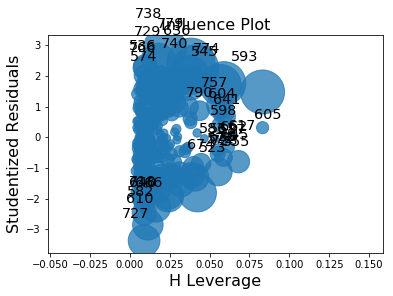

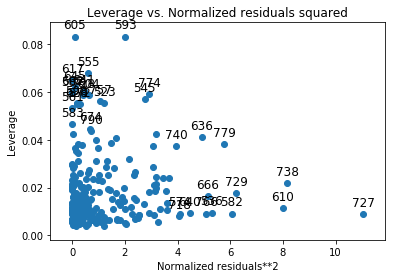

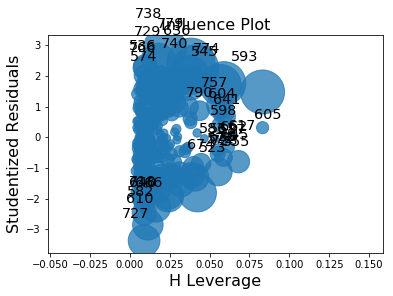

In [45]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(TE4)
influence_plot(TE4)
#It looks like there is a high residual but it is not a high leverage point so we will leave it in the data
#There is also a high leverage point but it is not a high residual so we will also leave that point in the data

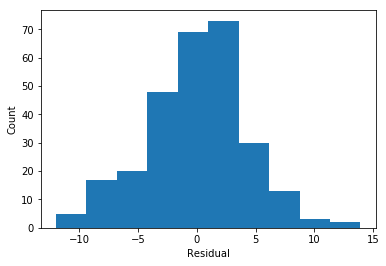

In [47]:
plt.hist(te['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

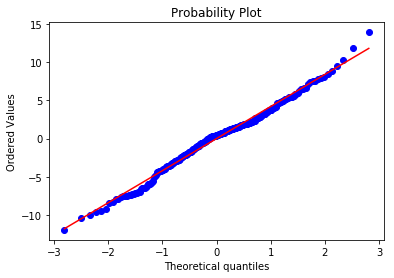

In [46]:
stats.probplot(te['Residual'], plot=plt)
plt.show()
#There does not appear to be any outliers in the residuals

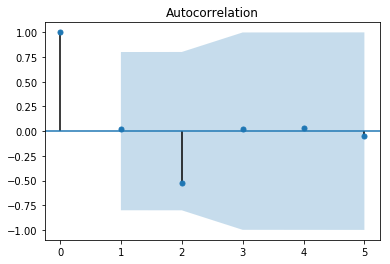

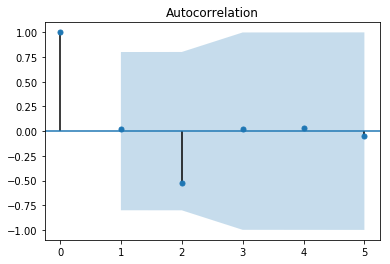

In [49]:
tecorr1 = te[['Overall Rating', 'Catching', 'Jumping', 'Release', 'Route Running', 'Stiff Arm']].corr()
plot_acf(tecorr1['Overall Rating'])
#there does not appear to be any autocorrelation looking at the plot below
#There is also a Durbin-Watson correlation of 1.537, which indicates no significant autocoreelation

In [50]:
#Finally, we check for homoskedasticity
het_breuschpagan(te['Residual'], tesig11)
#Due to the low p-values, we can reject the null that there is homoskedasticity in the data

(79.10471466761491,
 2.6955386835653103e-16,
 21.65685122734666,
 2.833200871980258e-18)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(tesig11, te['Overall Rating'], test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
tecv = cross_val_score(reg, tesig11, te['Overall Rating'], cv=5)
tecv_mean = np.mean(tecv)
print(tecv, tecv_mean)
#Our model explained an average of 71.1% of the regression.  It did very poorly on the last test but well on the first 4 tests

[0.90236558 0.87998966 0.92721466 0.78319862 0.30006889] 0.7585674815759076


In [40]:
X_train, X_test, y_train, y_test = train_test_split(tesig13, te['Overall Rating'], test_size=0.3, random_state=42)

In [41]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
tecv = cross_val_score(reg, tesig13, te['Overall Rating'], cv=5)
tecv_mean = np.mean(tecv)
print(tecv, tecv_mean)
#Our model explained an average of 71.1% of the regression.  It did very poorly on the last test but well on the first 4 tests

[0.90864222 0.89215332 0.92940954 0.78509984 0.0412384 ] 0.7113086665622382


In [52]:
tedesc = te[['Overall Rating', 'Catching', 'Jumping', 'Release', 'Route Running', 'Stiff Arm']]
tedesc1 = tedesc.describe()

In [55]:
tedesc1.to_csv('C:\\Users\\tilleymusprime\\Desktop\\tesig.csv')